>># **PROJET : Classifiez automatiquement des biens de consommation**

>>>Source du jeu de données : https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

>>>>>># **TRAITEE PROJET : notebook 3/4**

# **Charger les données**

> ## Fichier CSV

In [1]:
# import des librairies nécessaires
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cleaned = pd.read_csv('final_df.csv')

In [3]:
df_cleaned.head()

,_category_,_category_label_,description,_clean_text_,image
0,Home Furnishing,4,Key Features of Elegance Polyester Multicolor ...,"['key', 'featur', 'eleg', 'polyest', 'multicol...",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,0,Specifications of Sathiyas Cotton Bath Towel (...,"['specif', 'cotton', 'bath', 'towel', 'bath', ...",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,0,Key Features of Eurospa Cotton Terry Face Towe...,"['key', 'featur', 'cotton', 'terri', 'face', '...",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,4,Key Features of SANTOSH ROYAL FASHION Cotton P...,"['key', 'featur', 'royal', 'fashion', 'cotton'...",d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,4,Key Features of Jaipur Print Cotton Floral Kin...,"['key', 'featur', 'print', 'cotton', 'floral',...",6325b6870c54cd47be6ebfbffa620ec7.jpg


In [4]:
df_image = df_cleaned[['image', '_category_']]

In [5]:
df_image.columns

Index(['image', '_category_'], dtype='object')

In [6]:
df_image.head()

,image,_category_
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing


In [7]:
df_image.groupby('_category_').count()

,image
_category_,
Baby Care,150
Beauty and Personal Care,150
Computers,150
Home Decor and Festive Needs,150
Home Furnishing,150
Kitchen and Dining,150
Watches,150


> ## Photos

In [8]:
# Importez les bibliothèques nécessaires pour la manipulation d'images
import os
import cv2  # OpenCV pour le traitement des images

In [9]:
# Montez votre Google Drive dans Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Afficher les images**

In [10]:
# Chemin d'accès au dossier contenant les photos dans votre Google Drive
folder_path = '/content/drive/MyDrive/Images'

In [11]:
# Liste pour stocker les images chargées
images = []

# Parcourez le dossier et chargez les images
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Vous pouvez ajouter d'autres extensions d'images si nécessaire
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        images.append(img)

In [12]:
# Affichez le nombre d'images chargées
print("Nombre d'images chargées :", len(images))

Nombre d'images chargées : 1050


In [13]:
from sklearn import preprocessing

In [14]:
# 1. Récupérez les catégories '_category_' associées à chaque image dans le DataFrame df_image
categories = df_image['_category_']

# 2. Utilisez un LabelEncoder pour attribuer un identifiant numérique à chaque catégorie
le = preprocessing.LabelEncoder()
le.fit(categories)
labels = le.transform(categories)

# 3. Ajoutez une nouvelle colonne 'label' dans le DataFrame df_image
df_image['_label_'] = labels

# Visualisez les 5 premières lignes du DataFrame avec les nouvelles étiquettes "label"
df_image.head(5)

<ipython-input-14-fda6b9df80ee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image['_label_'] = labels


,image,_category_,_label_
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


> **Affichons la 1ère image du dossier**

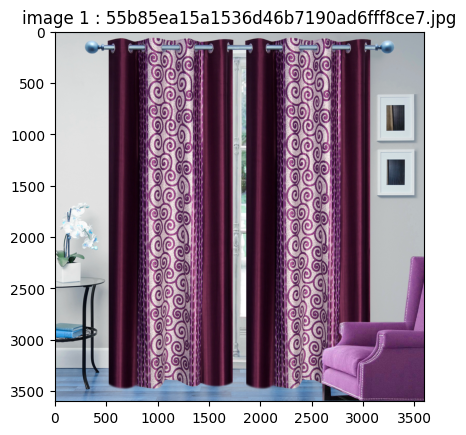

In [22]:
# Chargement de l'image
image_0 = folder_path + '/55b85ea15a1536d46b7190ad6fff8ce7.jpg'
image = cv2.imread(image_0)
plt.title('image 1 : 55b85ea15a1536d46b7190ad6fff8ce7.jpg')
plt.imshow(image)

0bb0f7b7a3075f4b9459121abe2185fa.jpg


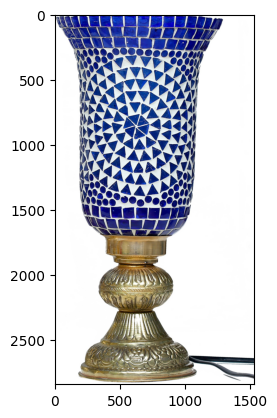

In [23]:
# Affichez la première image du dossier avec son nom ou titre
if len(images) > 0:
    image_1 = images[0]
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    print(os.path.basename(os.path.join(folder_path, os.listdir(folder_path)[0])))
    #plt.title(os.path.basename(os.path.join(folder_path, os.listdir(folder_path)[0])))  # Titre avec le nom du fichier
    plt.axis('on')
    plt.show()
else:
    print("Aucune image trouvée dans le dossier.")

7b72c92c2f6c40268628ec5f14c6d590.jpg

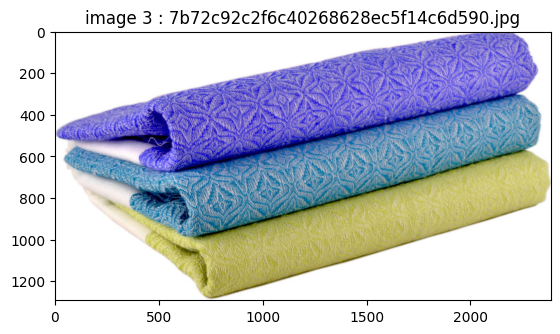

In [25]:
# Chargement de l'image
image_3 = folder_path + '/7b72c92c2f6c40268628ec5f14c6d590.jpg'
image = cv2.imread(image_3)
plt.title('image 3 : 7b72c92c2f6c40268628ec5f14c6d590.jpg')
plt.imshow(image)

# **Traitements d'images**



> **Avec SIFT :** Détection de points d'intérêt et amélioration de la qualité

In [26]:
from matplotlib.image import imread

In [27]:
# Fonction pour traiter l'image

def preprocess_image(image):
    # Élimination du bruit en utilisant un filtre Gaussien
    #img_noNuise = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
    img_noNuise = cv2.boxFilter(image, -1, (25, 25))

    # Conversion de l'image en noir et blanc (niveaux de gris)
    img_NB = cv2.cvtColor(img_noNuise, cv2.COLOR_BGR2GRAY)

    # Augmentation du contraste par égalisation de l'histogramme
    img_contraste = cv2.equalizeHist(img_NB)

    # Redimensionnement de l'image pour normaliser l'entrée (taille 224x224)
    dsize = (224, 224)
    img_redim = cv2.resize(img_contraste, dsize)

    # Créez un détecteur SIFT avec un nombre de keypoints maximum de 200
    sift = cv2.xfeatures2d.SIFT_create(200)

    # Détection des features (points d'intérêt) en utilisant SIFT
    kp, des = sift.detectAndCompute(img_redim, None)
    img_feat_sift = cv2.drawKeypoints(img_redim, kp, img_NB)

    return img_noNuise, img_NB, img_contraste, img_redim, img_feat_sift

In [28]:
# Fonction pour afficher les images traitées
def plot_processed_images(image):
    # Créez une figure pour afficher les images
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 3, 1)
    plt.axis('on')
    plt.title('1). Image de départ')
    plt.imshow(image)

    img_noNuise, img_NB, img_contraste, img_redim, img_feat_sift = preprocess_image(image)

    plt.subplot(2, 3, 2)
    plt.axis('on')
    plt.title('2). Débruité')
    plt.imshow(img_noNuise)

    plt.subplot(2, 3, 3)
    plt.axis('on')
    plt.title('3). Noir et blanc')
    plt.imshow(img_NB, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.axis('on')
    plt.title('4). Contraste amélioré')
    plt.imshow(img_contraste, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.axis('on')
    plt.title('5). Redimensionné')
    plt.imshow(img_redim, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.axis('on')
    plt.title('6). Features SIFT')
    plt.imshow(img_feat_sift)

    plt.show()

>> Charger les images soumises au traitement

In [29]:
df_image.image

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       64d5d4a258243731dc7bbb1eef49ad74.jpg
3       d4684dcdc759dd9cdf41504698d737d8.jpg
4       6325b6870c54cd47be6ebfbffa620ec7.jpg
                        ...                 
1045    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    fd6cbcc22efb6b761bd564c28928483c.jpg
1047    5912e037d12774bb73a2048f35a00009.jpg
1048    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object

>> **Image 1 du dossier**

In [30]:
df_image.image[0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

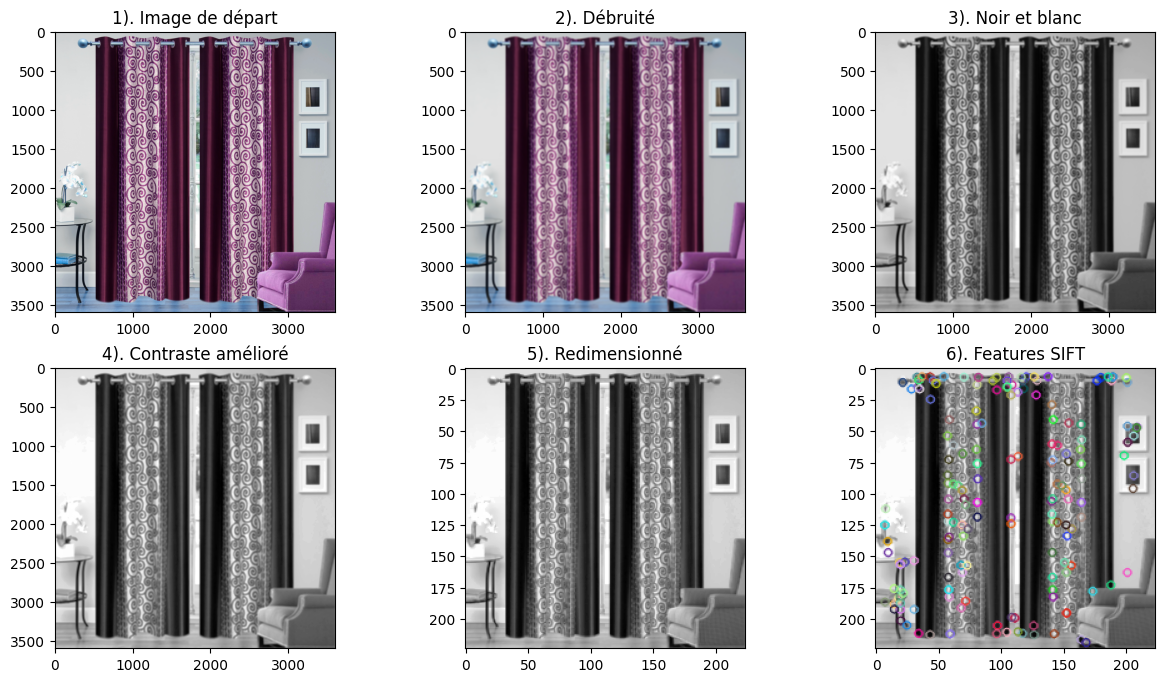

In [31]:
# Chemin d'accès à l'image que vous souhaitez traiter
#image_1 = folder_path + '/55b85ea15a1536d46b7190ad6fff8ce7.jpg'
image_1 = folder_path + '/' + df_image.image[0]

# Chargement de l'image
image = cv2.imread(image_1)

# Appel des fonctions pour prétraitement et affichage
plot_processed_images(image)

>> **Image 2 du dossier**

In [32]:
df_image.image[1]

'7b72c92c2f6c40268628ec5f14c6d590.jpg'

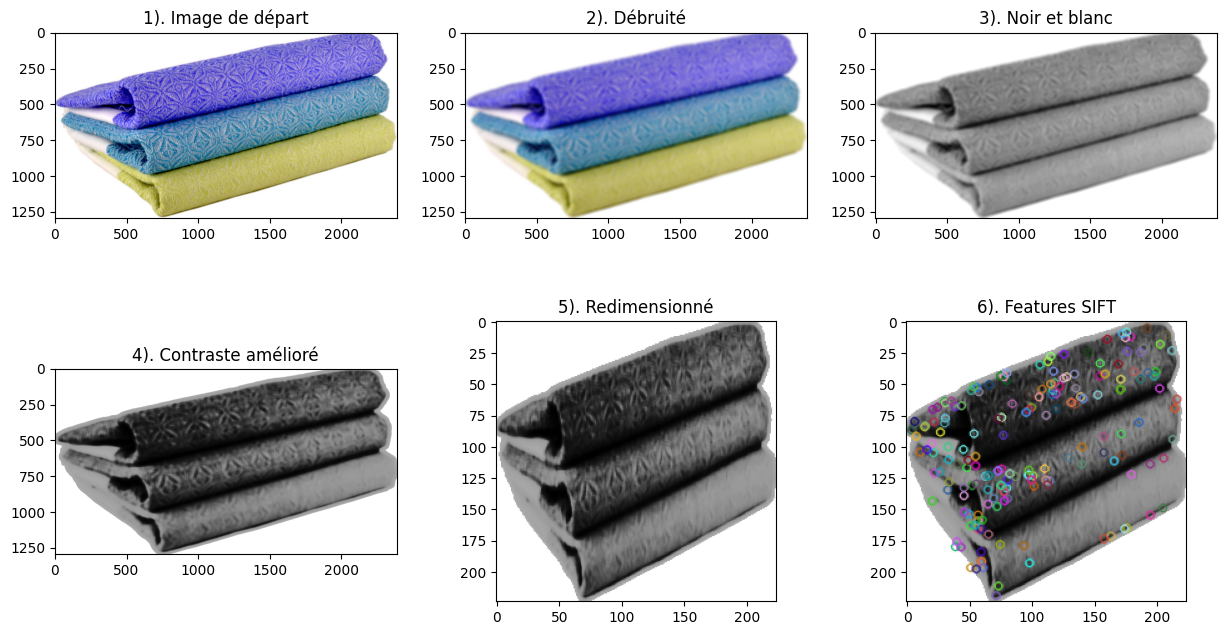

In [33]:
# Chemin d'accès à l'image que vous souhaitez traiter
image_2 = folder_path + '/' + df_image.image[1]

# Chargement de l'image
image = cv2.imread(image_2)

# Appel des fonctions pour prétraitement et affichage
plot_processed_images(image)

>> **Dernière image du dossier**

In [34]:
df_image.image[1049]

'f2f027ad6a6df617c9f125173da71e44.jpg'

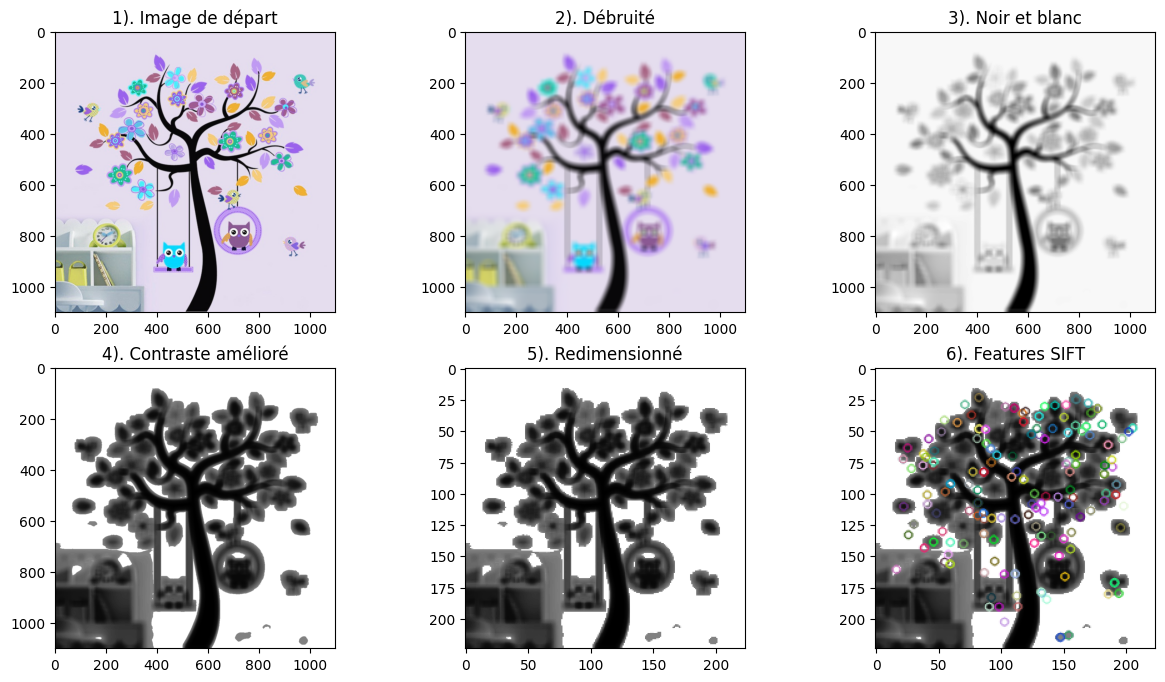

In [35]:
# Chemin d'accès à l'image que vous souhaitez traiter
last_image = folder_path + '/' + df_image.image[1049]

# Chargement de l'image
image = cv2.imread(last_image)

# Appel des fonctions pour prétraitement et affichage
plot_processed_images(image)

# **Etape 1 :** Etude de faisabilité

> ## **Création des descripteurs de chaque image** à l'aide de SIFT

NB: les fonctions preprocess_image et plot_processed_images restent inchangées


In [36]:
import time

In [37]:
# Fonction pour identifier les points clés et les descripteurs associés

def create_descriptors(images_list):
    # Créez un détecteur SIFT avec un nombre de keypoints maximum de 200
    sift = cv2.xfeatures2d.SIFT_create(200)

    # Créez un détecteur ORB avec un nombre de keypoints maximum de 200
    orb = cv2.ORB_create(200)

    # Listes pour stocker les descripteurs pour chaque image
    sift_descriptors_list = []
    orb_descriptors_list = []

    for image in images_list:
        # Prétraitement de l'image
        img_noNuise, img_NB, img_contraste, img_redim, img_feat_sift = preprocess_image(image)

        # Calculer les descripteurs avec SIFT
        start_time_sift = time.time()
        kp_sift, des_sift = sift.detectAndCompute(img_redim, None)
        sift_descriptors_list.append(des_sift)
        sift_duration = time.time() - start_time_sift

        # Calculer les descripteurs avec ORB
        start_time_orb = time.time()
        kp_orb, des_orb = orb.detectAndCompute(img_redim, None)
        orb_descriptors_list.append(des_orb)
        orb_duration = time.time() - start_time_orb

        print(f"Image {len(sift_descriptors_list)}: Nombre de descripteurs SIFT = {des_sift.shape[0]}")

        print(f"Temps de traitement SIFT descriptor : {sift_duration:.2f} secondes")

        print()

    return sift_descriptors_list, orb_descriptors_list

In [38]:
# Chargement de la liste d'images que vous souhaitez traiter
import random

# Calcul du nombre d'images à conserver (40% des images chargées)
num_images_to_keep = int(len(images))

# Sélection aléatoire de 40% des images chargées
selected_indices = random.sample(range(len(images)), num_images_to_keep)
images_list = [images[i] for i in selected_indices]

# Affichez le nombre d'images conservées
print("Nombre d'images conservées :", len(images_list))

Nombre d'images conservées : 1050


In [39]:
# Créer les descripteurs SIFT et ORB pour chaque image dans la liste
sift_descriptors_list, orb_descriptors_list = create_descriptors(images_list)

Image 1: Nombre de descripteurs SIFT = 142
Temps de traitement SIFT descriptor : 0.02 secondes

Image 2: Nombre de descripteurs SIFT = 144
Temps de traitement SIFT descriptor : 0.02 secondes

Image 3: Nombre de descripteurs SIFT = 131
Temps de traitement SIFT descriptor : 0.02 secondes

Image 4: Nombre de descripteurs SIFT = 44
Temps de traitement SIFT descriptor : 0.01 secondes

Image 5: Nombre de descripteurs SIFT = 65
Temps de traitement SIFT descriptor : 0.01 secondes

Image 6: Nombre de descripteurs SIFT = 167
Temps de traitement SIFT descriptor : 0.02 secondes

Image 7: Nombre de descripteurs SIFT = 39
Temps de traitement SIFT descriptor : 0.01 secondes

Image 8: Nombre de descripteurs SIFT = 36
Temps de traitement SIFT descriptor : 0.01 secondes

Image 9: Nombre de descripteurs SIFT = 24
Temps de traitement SIFT descriptor : 0.01 secondes

Image 10: Nombre de descripteurs SIFT = 134
Temps de traitement SIFT descriptor : 0.02 secondes

Image 11: Nombre de descripteurs SIFT = 85
T

In [40]:
# Convertir les descripteurs en un seul tableau pour SIFT
#print('-----A TITRE DE COMPARAISON : ----------------')
sift_keypoints_all = np.concatenate(sift_descriptors_list)
print('longueur des descripteurs SIFT : ', len(sift_keypoints_all))
print('\n')
'''# Convertir les descripteurs en un seul tableau pour ORB
orb_keypoints_all = np.concatenate(orb_descriptors_list)
print('longueur des descripteurs ORB  : ', len(orb_keypoints_all))'''

longueur des descripteurs SIFT :  132920




"# Convertir les descripteurs en un seul tableau pour SIFT et ORB\norb_keypoints_all = np.concatenate(orb_descriptors_list)\nprint('longueur des descripteurs ORB  : ', len(orb_keypoints_all))"

> ## **Clustering et création de features**

In [41]:
from sklearn import cluster, metrics
from sklearn.cluster import MiniBatchKMeans

# Détermination du nombre de clusters
temps1=time.time()
print('\n')

k_sift = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("-----> Nombre de clusters estimés pour SIFT : ", k_sift)
print("-----> Création de", k_sift, "clusters de descripteurs avec SIFT...")

print('--'*100)
# # Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k_sift, init_size=3*k_sift, random_state=42)
kmeans.fit(sift_keypoints_all)
clusters_centers = kmeans.cluster_centers_
print('--'*100)

print('\n')

duration1=time.time()-temps1
print("-----> Temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")
print( )



-----> Nombre de clusters estimés pour SIFT :  365
-----> Création de 365 clusters de descripteurs avec SIFT...
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


-----> Temps de traitement kmeans :             5.81 secondes



>> ### **Création des clusters de descripteurs**

In [42]:
nb_clusters = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("-----> Nombre de clusters de descripteurs estimés pour SIFT est de : ", nb_clusters)

-----> Nombre de clusters de descripteurs estimés pour SIFT est de :  365


>> ### **Création des features des images**

In [43]:
def create_features(descriptors_list, clusters_centers):
    features_list = []
    for descriptors in descriptors_list:
        # Prédiction des numéros de cluster de chaque descripteur
        predictions = clusters_centers.predict(descriptors)

        # Création d'un histogramme : comptage pour chaque numéro de cluster du nombre de descripteurs de l'image
        histogram, _ = np.histogram(predictions, bins=np.arange(len(clusters_centers.cluster_centers_) + 1))

        # Ajouter l'histogramme à la liste des features
        features_list.append(histogram)

    return features_list

In [44]:
# Création des features SIFT
start_time_features = time.time()
img_features = create_features(sift_descriptors_list, kmeans)
end_time_features = time.time() - start_time_features
print("Temps de création des features SIFT : ", "%15.2f" % end_time_features, "secondes")

Temps de création des features SIFT :             0.87 secondes


In [45]:
images_features = np.asarray(img_features)
print("Taille des features : ", images_features.shape)

Taille des features :  (1050, 365)


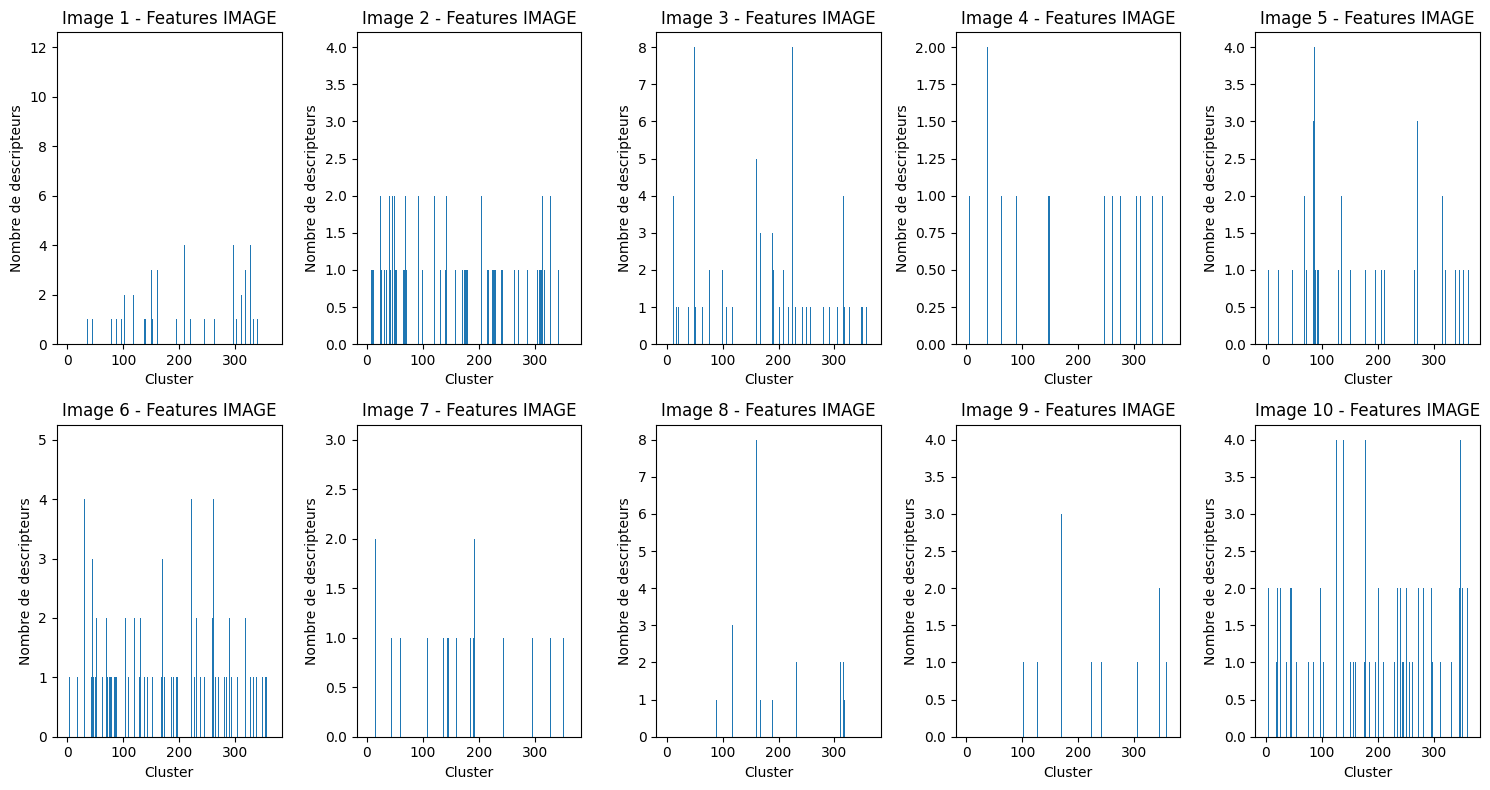

In [46]:
# # # Afficher les 10 premiers histogrammes des features

# Configuration des sous-graphiques
num_rows = 2
num_cols = 5

# Créer une figure et des axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Parcourir les histogrammes et les afficher dans les sous-graphiques
for i, histogram in enumerate(img_features[:10]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.bar(range(len(histogram)), histogram)
    ax.set_title(f"Image {i+1} - Features IMAGE")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Nombre de descripteurs")

    # Ajustement des espacements
    plt.tight_layout()

# Afficher les sous-graphiques
plt.show()


> ## **Réduction de dimension et analyse**

>> ### Réduction de dimension PCA

- La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)


- L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [47]:
from sklearn import manifold, decomposition

print("Dimensions dataset SIFT avant réduction PCA : ", images_features.shape)

pca = decomposition.PCA(n_components=0.99)

feat_pca = pca.fit_transform(images_features)

print("Dimensions dataset SIFT après réduction PCA : ", feat_pca.shape)

Dimensions dataset SIFT avant réduction PCA :  (1050, 365)
Dimensions dataset SIFT après réduction PCA :  (1050, 322)


>> ### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [48]:
nb_clusters

365

In [60]:
from sklearn import manifold, decomposition, cluster
from sklearn.metrics import adjusted_rand_score
import time

def perform_tsne_and_clustering(feat_pca_sift, nb_cls_sift):
    temps1 = time.time()

    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=1944)
    X_tsne = tsne.fit_transform(feat_pca)

    # Détermination des clusters à partir des données après Tsne

    predicted_clusters = kmeans.fit_predict(X_tsne)  # Kmeans provient du clustering opéré précedement via MiniBatchKMeans

    # Calcul du score ARI
    true_labels = df_image["_label_"]
    ari_score = adjusted_rand_score(true_labels, predicted_clusters)
    print( )
    print("Score ARI:", ari_score)
    print( )
    duration1 = time.time() - temps1
    print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

    return X_tsne, true_labels, predicted_clusters


In [61]:
df_image._category_

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: _category_, Length: 1050, dtype: object

In [62]:
def plot_tsne_and_clustering(X_tsne, true_labels, nb_clusters):

    # Créer le DataFrame pour la visualisation
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["class"] = true_labels

    # Plot des résultats t-SNE et clustering
    plt.figure(figsize=(15, 6))

    # Plot t-SNE
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="class",  # Utiliser la colonne "class" pour la couleur
        palette=sns.color_palette('tab10', n_colors=len(pd.unique(true_labels))), s=50, alpha=0.6,
        data=df_tsne)
    plt.title('TSNE selon les vraies classes', fontsize=20)
    plt.xlabel('tsne1', fontsize=16)
    plt.ylabel('tsne2', fontsize=16)
    plt.legend(prop={'size': 12})

    # Plot clustering
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="class",  # Utiliser la colonne "class" pour la couleur
        palette=sns.color_palette('tab10', n_colors=len(pd.unique(true_labels))), s=50, alpha=0.6,
        data=df_tsne)
    plt.title('TSNE avec clustering KMeans', fontsize=20)
    plt.xlabel('tsne1', fontsize=16)
    plt.ylabel('tsne2', fontsize=16)
    plt.legend(prop={'size': 12})

    plt.tight_layout()
    plt.show()

In [63]:
# Appel de la première fonction pour afficher le score ARI et le temps d'exécution de la TSNE
X_tsne, true_labels, predicted_clusters = perform_tsne_and_clustering(feat_pca, nb_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Score ARI: 9.646806042911459e-05

temps de T-SNE :            25.22 secondes


In [64]:
df_image.groupby('_label_')['_category_'].unique()


_label_
0                       [Baby Care]
1        [Beauty and Personal Care]
2                       [Computers]
3    [Home Decor and Festive Needs]
4                 [Home Furnishing]
5              [Kitchen and Dining]
6                         [Watches]
Name: _category_, dtype: object

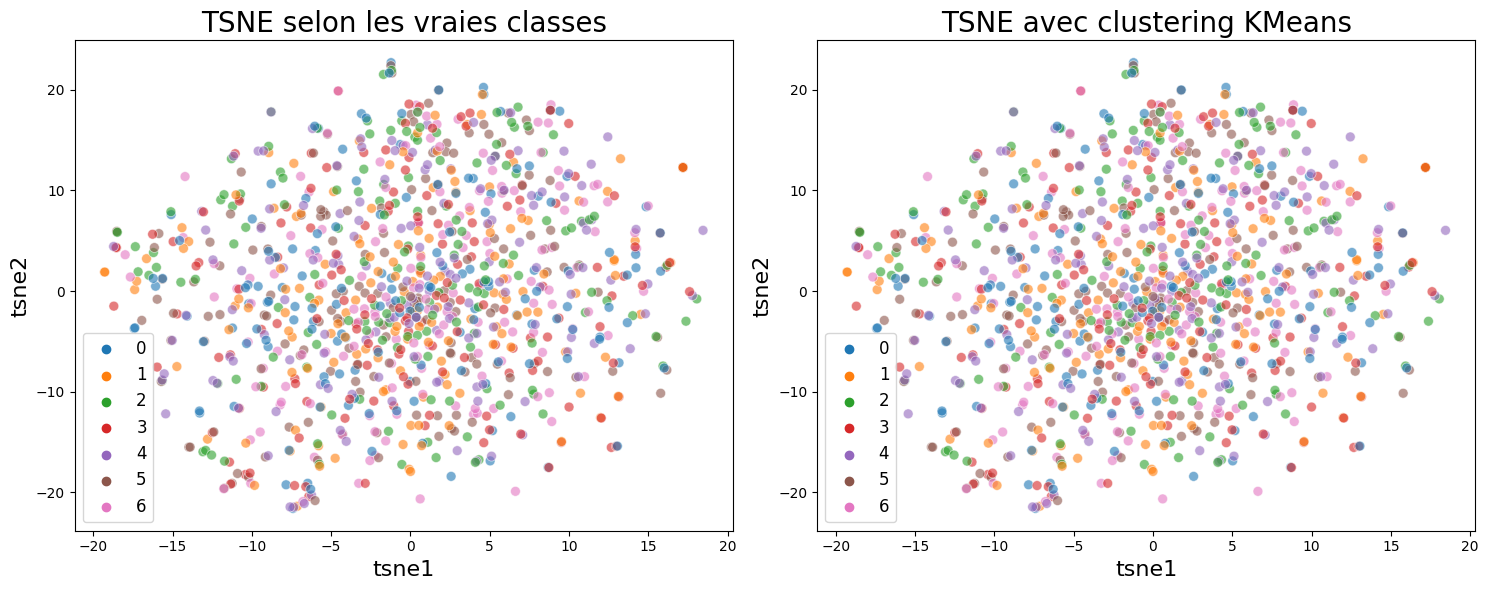

In [65]:
# Appel de la deuxième fonction pour tracer les résultats
plot_tsne_and_clustering(X_tsne, true_labels, nb_clusters)